In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df = pd.read_excel("Analytics Challenge.xlsx","Data")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
Transaction_ID                       30940 non-null object
Profile ID                           30940 non-null int64
Date_of_Booking                      30940 non-null datetime64[ns]
Date_of_Service_Requested            30940 non-null datetime64[ns]
Source                               30940 non-null object
Slot of Booking (Hour of the Day)    30940 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 1.4+ MB


# ANSWER - 1
## Plot of new users acquired every month

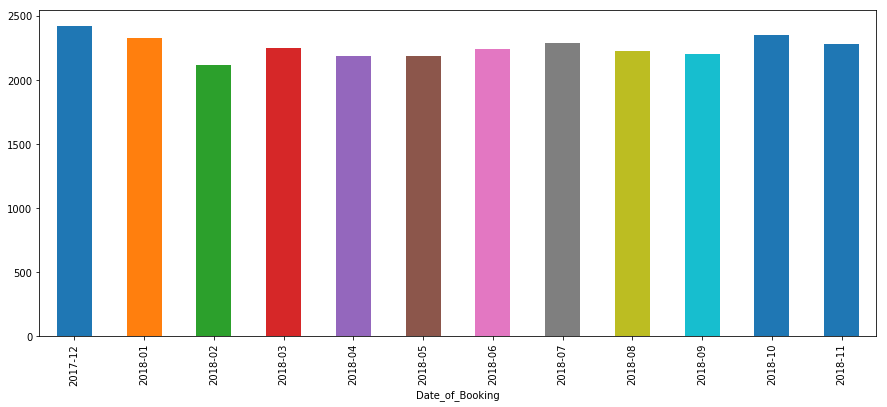

In [106]:
df.groupby(df["Date_of_Booking"].dt.to_period("M"))["Profile ID"].nunique().plot(kind = "bar",figsize = (15,6))

In [21]:
df.groupby(df["Date_of_Booking"].dt.to_period("M")).count()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
Date_of_Booking,,,,,,
2017-12,2761,2761,2761,2761,2761,2761
2018-01,2675,2675,2675,2675,2675,2675
2018-02,2403,2403,2403,2403,2403,2403
2018-03,2600,2600,2600,2600,2600,2600
2018-04,2483,2483,2483,2483,2483,2483
2018-05,2510,2510,2510,2510,2510,2510
2018-06,2571,2571,2571,2571,2571,2571
2018-07,2616,2616,2616,2616,2616,2616
2018-08,2556,2556,2556,2556,2556,2556


In [23]:
dec = df.groupby(df["Date_of_Booking"].dt.to_period("M")).filter(lambda x: x["Date_of_Booking"].count()==2761)

# Answer - 2
## 30 Day Repeat for december 2017

In [33]:
(len(dec["Profile ID"].value_counts()>1))/(dec["Profile ID"].count())*100

87.79427743571169

In [34]:
jan = df.groupby(df["Date_of_Booking"].dt.to_period("M")).filter(lambda x: x["Date_of_Booking"].count()==2675)
feb = df.groupby(df["Date_of_Booking"].dt.to_period("M")).filter(lambda x: x["Date_of_Booking"].count()==2403)
mar = df.groupby(df["Date_of_Booking"].dt.to_period("M")).filter(lambda x: x["Date_of_Booking"].count()==2600)

In [41]:
quarter = jan.append(feb)
quarter = quarter.append(mar)

# ANSWER - 3
## 90 Day Repeat for first quarter of 2018

In [43]:
(len(quarter["Profile ID"].value_counts()>1))/(quarter["Profile ID"].count())*100

74.29017973430581

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
Transaction_ID                       30940 non-null object
Profile ID                           30940 non-null int64
Date_of_Booking                      30940 non-null datetime64[ns]
Date_of_Service_Requested            30940 non-null datetime64[ns]
Source                               30940 non-null object
Slot of Booking (Hour of the Day)    30940 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 1.4+ MB


In [47]:
source = pd.get_dummies(df['Source'])

In [48]:
df.drop(['Source','Transaction_ID'],axis=1,inplace=True)

In [49]:
df = pd.concat([df,source],axis=1)

In [54]:
df["gap"] = df["Date_of_Service_Requested"]-df["Date_of_Booking"]

In [58]:
df["gap"] = df.gap.dt.days

In [62]:
df.drop(['Date_of_Booking','Date_of_Service_Requested'],axis=1,inplace=True)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Profile ID',axis=1), 
                                                    df['Profile ID'], test_size=0.30)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
predictions = logmodel.predict(X_test)

In [74]:
nov = df.groupby(df["Date_of_Booking"].dt.to_period("M")).filter(lambda x: x["Date_of_Booking"].count()==2577)

In [75]:
source = pd.get_dummies(nov['Source'])

nov.drop(['Source','Transaction_ID'],axis=1,inplace=True)

nov = pd.concat([nov,source],axis=1)

nov["gap"] = nov["Date_of_Service_Requested"]-nov["Date_of_Booking"]

nov["gap"] = nov.gap.dt.days

nov.drop(['Date_of_Booking','Date_of_Service_Requested'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [83]:
logmodel.predict(nov.drop("Profile ID",axis=1))

array([ 9066, 14921, 14921, ...,  4210,  5431,  9066], dtype=int64)

In [84]:
nov["Prediction"] = logmodel.predict(nov.drop("Profile ID",axis=1))

# Answer  - 4
## 30 Day Repeat for nov 2018 using logistic regression

In [85]:
(len(nov["Prediction"].value_counts()>1))/(nov["Prediction"].count())*100

1.2029491656965465

In [87]:
first = dec.append(jan)
first = first.append(feb)

# Answer - 5
## Plot of distribution of users by frequency of their 90 day repeat for first 90 days

#### P.S. - Graph is congested because of too many users and is in decreasing order

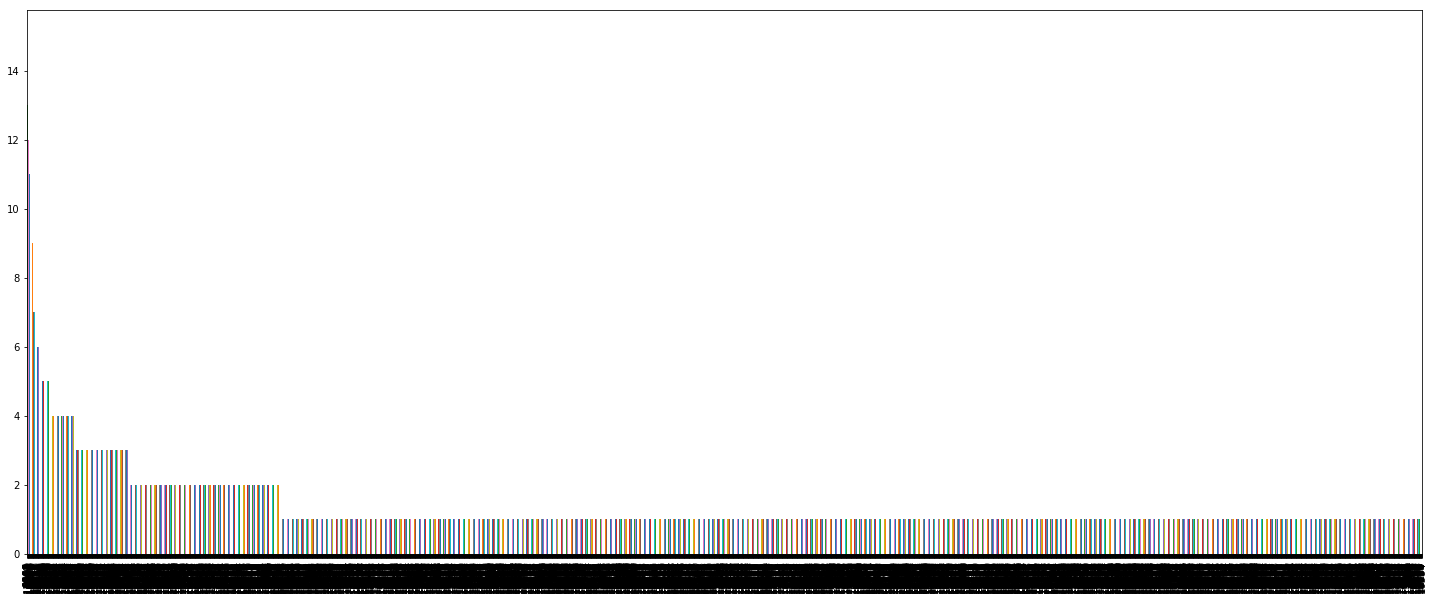

In [102]:
first["Profile ID"].value_counts().plot(kind = "bar",figsize = (25,10))